### This notebook compares the performance of the Decision Tree model and the Neural Network model on the Telco Customer Churn dataset using the test set.

In [1]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
# Load Processed Test Data
X_test = np.load(r"../data/processed/X_test.npy")
y_test = np.load(r"../data/processed/y_test.npy")

In [4]:
# Load Trained Models
models_path = r"../models"
dt_model = joblib.load(f"{models_path}/decision_tree_model.joblib")
nn_model = joblib.load(f"{models_path}/neural_network_model.joblib")

In [5]:
# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Decision Tree Performance")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Performance
Accuracy: 0.7935
ROC-AUC Score: 0.8270

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.59      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Confusion Matrix:
 [[896 139]
 [152 222]]


In [7]:
# Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test)
y_proba_nn = nn_model.predict_proba(X_test)[:, 1]

accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

print("Neural Network Performance")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"ROC-AUC Score: {roc_auc_nn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Performance
Accuracy: 0.8013
ROC-AUC Score: 0.8411

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[935 100]
 [180 194]]


### Visual Comparison 

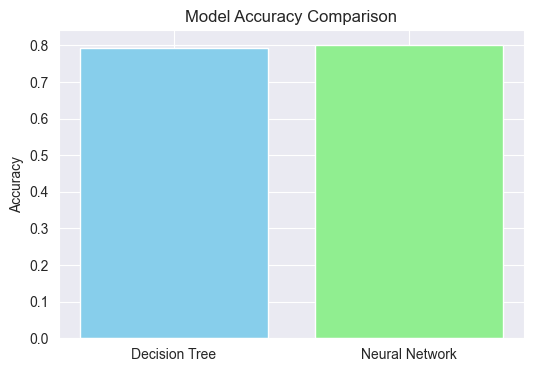

In [8]:
# Bar chart for accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Neural Network'], [accuracy_dt, accuracy_nn], color=['skyblue', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()